## Interpolacíon Newton-Gregory:

Para el siguiente conjunto de puntos:
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/
InterpolacionNewtonNoequi.csv
Encuentre el polinomio interpolante de menor grado usando el metodo Newton-Gregory.


El polinomio de Newton es: -0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0


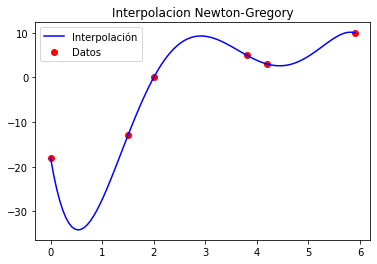

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
import sympy as sym
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
filename = 'InterpolacionNewtonNoequi.csv'
urllib.request.urlretrieve(url, filename)
data = pd.read_csv(filename, skiprows=[0], header=None, names=['x', 'y'])
def calcula_coeficientes_interpolacion_newton(x, y):
    n = len(x)
    a = []
    valores_a = np.zeros([n,n])
    for i in range(len(x)):
        for j in range(len(y)):
            if j == 0:
                valores_a[i,j] = y[i]
            elif i < j:
                valores_a[i,j] = (y[j]-y[j-1])/(x[i]-x[i-1])
            else:
                valores_a[i,j] = (valores_a[i,j-1] - valores_a[i-1,j-1])/(x[i]-x[i-j])
            if i == j:
                a.append(valores_a[i,j])
    return a 
def calcula_polinomio_newton(lista, x, y):
    a = calcula_coeficientes_interpolacion_newton(x, y)
    suma = a[0]
    poly = 1.0
    for i in range(1,len(x)):
        poly *= ( lista - x[i-1] )
        suma += poly*(a[i])
    return suma 
x = data['x'].values
y = data['y'].values
lista = np.linspace(np.min(x),np.max(x),100)
w = sym.Symbol('x')
f = calcula_polinomio_newton(w,x,y)
f = sym.expand(f)
print("El polinomio de Newton es:" , f)
valor = calcula_polinomio_newton(lista, x, y)
plt.plot(lista, valor, color="blue")
plt.scatter(x,y, color="r")
plt.title("Interpolacion Newton-Gregory")
leyenda = plt.legend(["Interpolación","Datos"])
plt.show()